In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

X_train = np.array(train_data.drop(['id', 'digit', 'letter'], axis=1)).astype('float32')
X_test = np.array(test_data.drop(['id', 'letter'], axis=1)).astype('float32')

y_train = to_categorical(np.array(train_data['digit']), num_classes=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1004)

X_train = X_train.reshape((X_train.shape[0], 28, 28))
X_val = X_val.reshape((X_val.shape[0], 28, 28))
X_test = X_test.reshape((X_test.shape[0], 28, 28))

In [2]:
def show_10_imgs(imgs):
    plt.figure(figsize=(20, 5))
    for i in range(10):
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(imgs[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

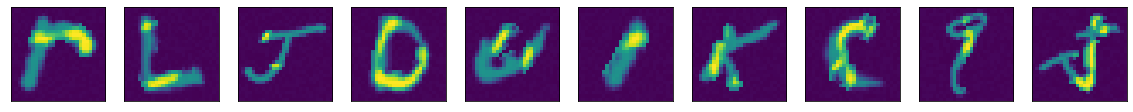

In [3]:
show_10_imgs(X_train)

# 노란색 부분(상대적으로 값이 큰 부분)만 남기기

In [4]:
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

threshold = 0.6
X_train[X_train < threshold] = 0
X_val[X_val < threshold] = 0
X_test[X_test < threshold] = 0

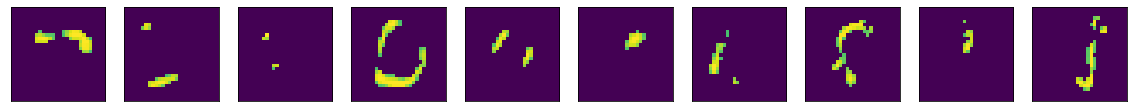

In [5]:
show_10_imgs(X_train)

# 노란색 부분들을 숫자별로 더하기

In [6]:
digit_ref = np.zeros((10, 28, 28))
for (idx, digit) in enumerate(y_train):
    digit = np.argmax(digit)
    digit_ref[digit] += X_train[idx]

digit_ref = digit_ref / np.max(digit_ref)

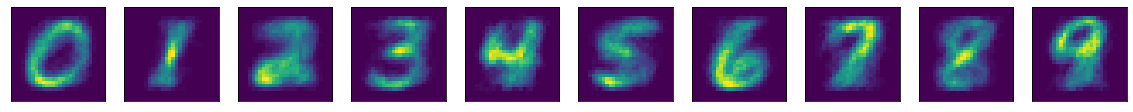

In [7]:
show_10_imgs(digit_ref)

In [8]:
digit_ref[digit_ref < 0.25] = 0

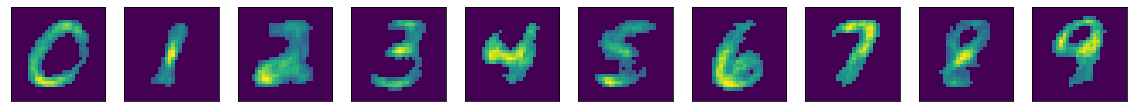

In [9]:
show_10_imgs(digit_ref)

In [10]:
digit_ref[digit_ref != 0] = 1

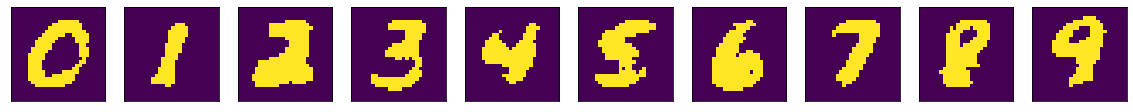

In [11]:
show_10_imgs(digit_ref)